# 1. 데이터 불러오기

In [1]:
import os
os.chdir('C:/Users/hu612/Desktop/School/수DA쟁이/Project/개인과제/data')

In [2]:
import pandas as pd
import numpy as np

train=pd.read_csv('train_features.csv')
train_labels=pd.read_csv('train_labels.csv')
test=pd.read_csv('test_features.csv')
submission=pd.read_csv('sample_submission.csv')

# 2. 데이터 파악

In [3]:
train.shape

(1875000, 8)

In [66]:
train.head(5)

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234


In [5]:
train_labels.shape

(3125, 3)

In [67]:
train_labels.head(5)

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise


In [64]:
all_train= pd.merge(train, train_labels, on='id',how='outer')
all_train.head(5)

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,label,label_desc
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112,37,Shoulder Press (dumbbell)
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216,37,Shoulder Press (dumbbell)
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629,37,Shoulder Press (dumbbell)
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013,37,Shoulder Press (dumbbell)
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234,37,Shoulder Press (dumbbell)


In [10]:
all_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1875000 entries, 0 to 1874999
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          int64  
 1   time        int64  
 2   acc_x       float64
 3   acc_y       float64
 4   acc_z       float64
 5   gy_x        float64
 6   gy_y        float64
 7   gy_z        float64
 8   label       int64  
 9   label_desc  object 
dtypes: float64(6), int64(3), object(1)
memory usage: 157.4+ MB


In [40]:
all_train.isnull().sum()

id            0
time          0
acc_x         0
acc_y         0
acc_z         0
gy_x          0
gy_y          0
gy_z          0
label         0
label_desc    0
dtype: int64

In [12]:
all_train[['label','label_desc']].value_counts()

label  label_desc                                  
26     Non-Exercise                                    910800
8      Device on Table                                  58200
28     Plank                                            33000
60     Wall Squat                                       28800
18     Jump Rope                                        28200
                                                        ...  
53     Triceps Kickback (knee on bench) (right arm)      7800
13     Dumbbell Row (knee on bench) (right arm)          7200
12     Dumbbell Row (knee on bench) (left arm)           7200
52     Triceps Kickback (knee on bench) (left arm)       7200
0      Arm Band Adjustment                               7200
Length: 61, dtype: int64

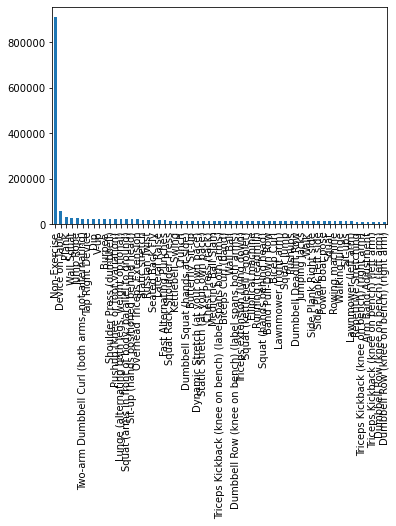

In [68]:
import matplotlib.pyplot as plt
all_train['label_desc'].value_counts().plot(kind="bar")
#plt.plot(all_train['label'])
#plt.figure(figsize=(100,100))
#plt.xticks(rotation=-45)
plt.show()

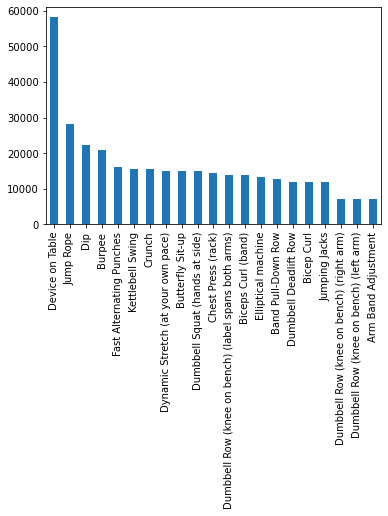

In [38]:
# 막대그래프 그리기
all_train1 = all_train[(all_train['label']>=0) &(all_train['label']<=20)]

import matplotlib.pyplot as plt
all_train1['label_desc'].value_counts().plot(kind="bar")
#plt.plot(all_train['label'])
#plt.figure(figsize=(100,100))
#plt.xticks(rotation=-45)
plt.show()

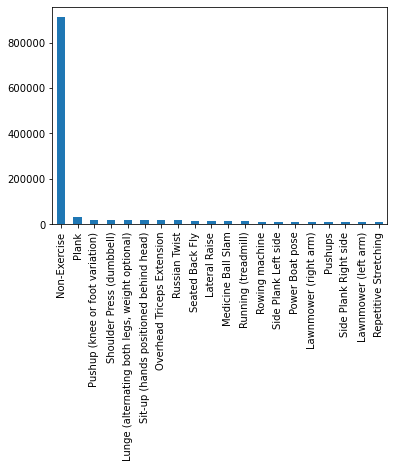

In [37]:
all_train2 = all_train[(all_train['label']>=21) &(all_train['label']<=40)]

import matplotlib.pyplot as plt
all_train2['label_desc'].value_counts().plot(kind="bar")
#plt.plot(all_train['label'])
#plt.figure(figsize=(100,100))
#plt.xticks(rotation=45)
plt.show()

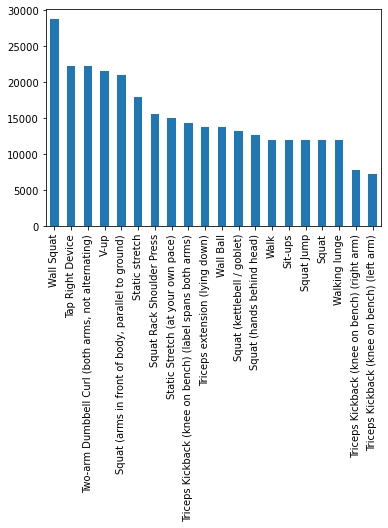

In [39]:
all_train2 = all_train[(all_train['label']>=41) &(all_train['label']<=61)]

import matplotlib.pyplot as plt
all_train2['label_desc'].value_counts().plot(kind="bar")
#plt.plot(all_train['label'])
#plt.figure(figsize=(100,100))
#plt.xticks(rotation=45)
plt.show()

# 3. 데이터 특징 찾아보기

In [70]:
all_train['exercise']=1
all_train.loc[(all_train.label == 26), 'exercise'] = 0

<AxesSubplot:xlabel='exercise', ylabel='gy_z'>

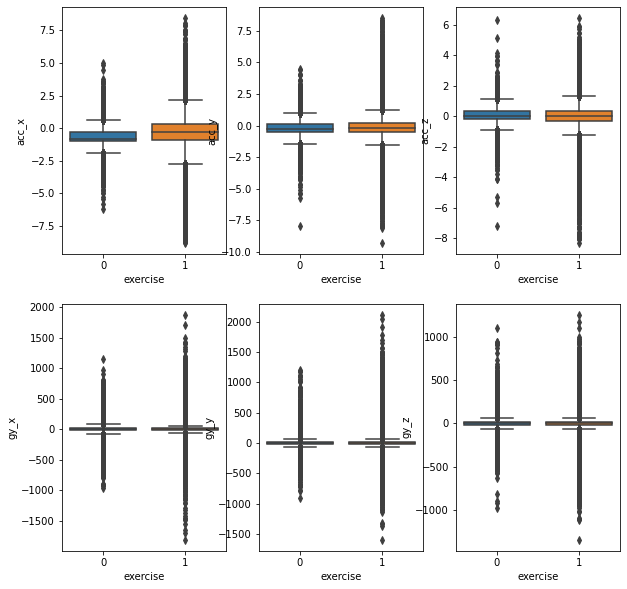

In [82]:
import seaborn as sns
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,4)
ax3 = fig.add_subplot(2,3,2)
ax4 = fig.add_subplot(2,3,5)
ax5 = fig.add_subplot(2,3,3)
ax6 = fig.add_subplot(2,3,6)

sns.boxplot(x='exercise', y='acc_x', data=all_train, ax=ax1)
sns.boxplot(x='exercise', y='gy_x', data=all_train, ax=ax2)
sns.boxplot(x='exercise', y='acc_y', data=all_train, ax=ax3)
sns.boxplot(x='exercise', y='gy_y', data=all_train, ax=ax4)
sns.boxplot(x='exercise', y='acc_z', data=all_train, ax=ax5)
sns.boxplot(x='exercise', y='gy_z', data=all_train, ax=ax6)

In [53]:
all_train1 = all_train[all_train['exercise']==1]

<AxesSubplot:xlabel='exercise', ylabel='gy_z'>

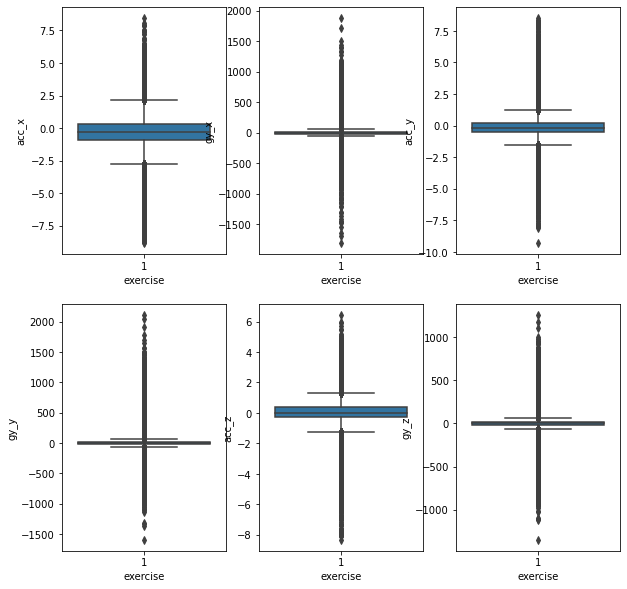

In [54]:
import seaborn as sns
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

sns.boxplot(x='exercise', y='acc_x', data=all_train1, ax=ax1)
sns.boxplot(x='exercise', y='gy_x', data=all_train1, ax=ax2)
sns.boxplot(x='exercise', y='acc_y', data=all_train1, ax=ax3)
sns.boxplot(x='exercise', y='gy_y', data=all_train1, ax=ax4)
sns.boxplot(x='exercise', y='acc_z', data=all_train1, ax=ax5)
sns.boxplot(x='exercise', y='gy_z', data=all_train1, ax=ax6)

In [56]:
all_train2 = all_train[all_train['exercise']==0]

<AxesSubplot:xlabel='exercise', ylabel='gy_z'>

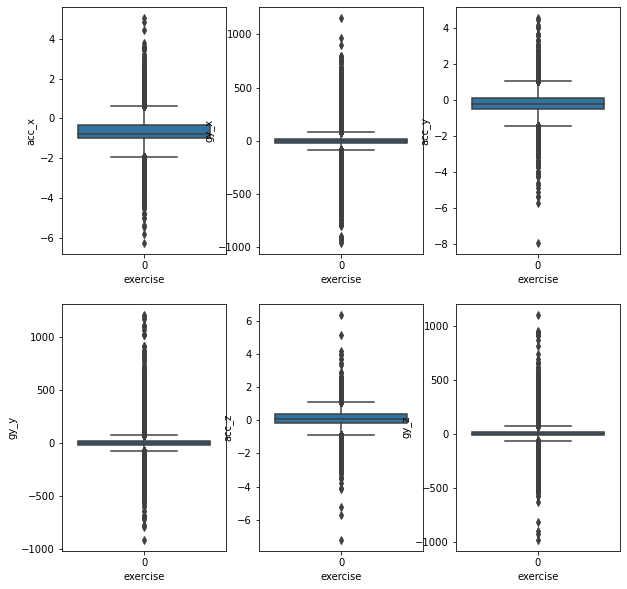

In [63]:
import seaborn as sns
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,3,1)
ax2 = fig.add_subplot(2,3,2)
ax3 = fig.add_subplot(2,3,3)
ax4 = fig.add_subplot(2,3,4)
ax5 = fig.add_subplot(2,3,5)
ax6 = fig.add_subplot(2,3,6)

sns.boxplot(x='exercise', y='acc_x', data=all_train2, ax=ax1)
sns.boxplot(x='exercise', y='gy_x', data=all_train2, ax=ax2)
sns.boxplot(x='exercise', y='acc_y', data=all_train2, ax=ax3)
sns.boxplot(x='exercise', y='gy_y', data=all_train2, ax=ax4)
sns.boxplot(x='exercise', y='acc_z', data=all_train2, ax=ax5)
sns.boxplot(x='exercise', y='gy_z', data=all_train2, ax=ax6)